## Housing Market Analysis: Distance, Room Count, and Amenities ##

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


In [3]:
file_path = r'C:\Users\DELL\OneDrive\Documents\GitHub\HEM-Housing-ML-Model\clean-datasets\mel-housing-data-cleaned.csv'
data = pd.read_csv(file_path)

In [4]:
# Polynomial Features setup
poly = PolynomialFeatures(degree=2)
regressor = LinearRegression()

## 1. Price vs Distance for 5-Room Houses ##

In [5]:
# Filter data for 5-room houses
filtered_data_5_rooms = data[data['Rooms'] == 5]
X_5_rooms = filtered_data_5_rooms['Distance_from_CBD'].values.reshape(-1, 1)
y_5_rooms = filtered_data_5_rooms['Price'].values

# Polynomial transformation (degree 2)
X_poly_5_rooms = poly.fit_transform(X_5_rooms)

# Perform polynomial regression
regressor.fit(X_poly_5_rooms, y_5_rooms)

# Create smoother polynomial fit curve
X_range_5_rooms = np.linspace(X_5_rooms.min(), X_5_rooms.max(), 100).reshape(-1, 1)
X_range_poly_5_rooms = poly.transform(X_range_5_rooms)
y_range_pred_5_rooms = regressor.predict(X_range_poly_5_rooms)

# R-squared value
r2_5_rooms = r2_score(y_5_rooms, regressor.predict(X_poly_5_rooms))

# Remove outliers with a stricter threshold
y_pred_actual_5_rooms = regressor.predict(X_poly_5_rooms)
residuals_5_rooms = np.abs(y_5_rooms - y_pred_actual_5_rooms)
threshold_5_rooms = 300000  # Stricter threshold for filtering out more outliers
filtered_indices_5_rooms = residuals_5_rooms <= threshold_5_rooms
X_5_rooms_filtered = X_5_rooms[filtered_indices_5_rooms]
y_5_rooms_filtered = y_5_rooms[filtered_indices_5_rooms]

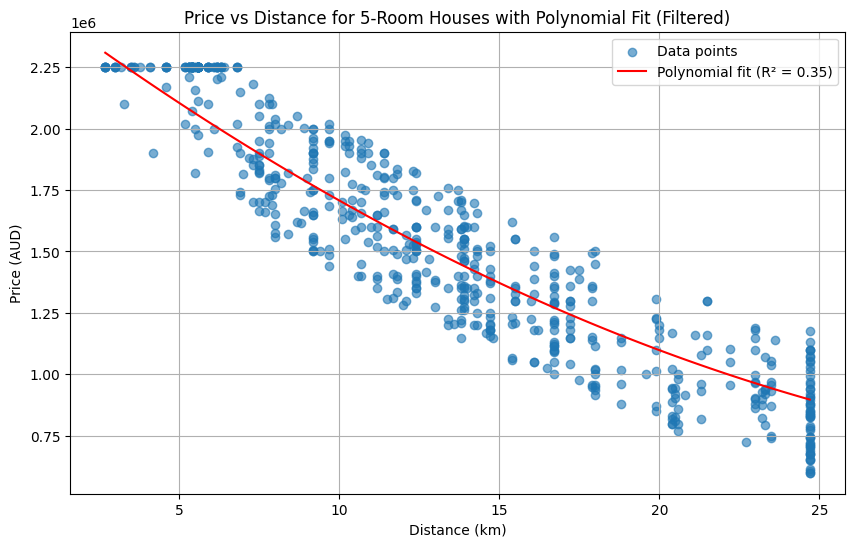

In [6]:
# Plot for 5-room houses
plt.figure(figsize=(10, 6))
plt.scatter(X_5_rooms_filtered, y_5_rooms_filtered, alpha=0.6, label="Data points")
plt.plot(X_range_5_rooms, y_range_pred_5_rooms, color='red', label=f"Polynomial fit (R² = {r2_5_rooms:.2f})")
plt.title("Price vs Distance for 5-Room Houses with Polynomial Fit (Filtered)")
plt.xlabel("Distance (km)")
plt.ylabel("Price (AUD)")
plt.legend()
plt.grid(True)
plt.show()

## 2. Price vs Distance for 3-Bathroom Houses ##

In [7]:
# Filter data for 3-bathroom houses
filtered_data_3_bathrooms = data[data['Bathroom'] == 3]
X_3_bathrooms = filtered_data_3_bathrooms['Distance_from_CBD'].values.reshape(-1, 1)
y_3_bathrooms = filtered_data_3_bathrooms['Price'].values

# Polynomial transformation (degree 2)
X_poly_3_bathrooms = poly.fit_transform(X_3_bathrooms)

# Perform polynomial regression
regressor.fit(X_poly_3_bathrooms, y_3_bathrooms)

# Create smoother polynomial fit curve
X_range_3_bathrooms = np.linspace(X_3_bathrooms.min(), X_3_bathrooms.max(), 100).reshape(-1, 1)
X_range_poly_3_bathrooms = poly.transform(X_range_3_bathrooms)
y_range_pred_3_bathrooms = regressor.predict(X_range_poly_3_bathrooms)

# R-squared value
r2_3_bathrooms = r2_score(y_3_bathrooms, regressor.predict(X_poly_3_bathrooms))

# Remove outliers with a stricter threshold
y_pred_actual_3_bathrooms = regressor.predict(X_poly_3_bathrooms)
residuals_3_bathrooms = np.abs(y_3_bathrooms - y_pred_actual_3_bathrooms)
threshold_3_bathrooms = 300000  # Stricter threshold for filtering out more outliers
filtered_indices_3_bathrooms = residuals_3_bathrooms <= threshold_3_bathrooms
X_3_bathrooms_filtered = X_3_bathrooms[filtered_indices_3_bathrooms]
y_3_bathrooms_filtered = y_3_bathrooms[filtered_indices_3_bathrooms]



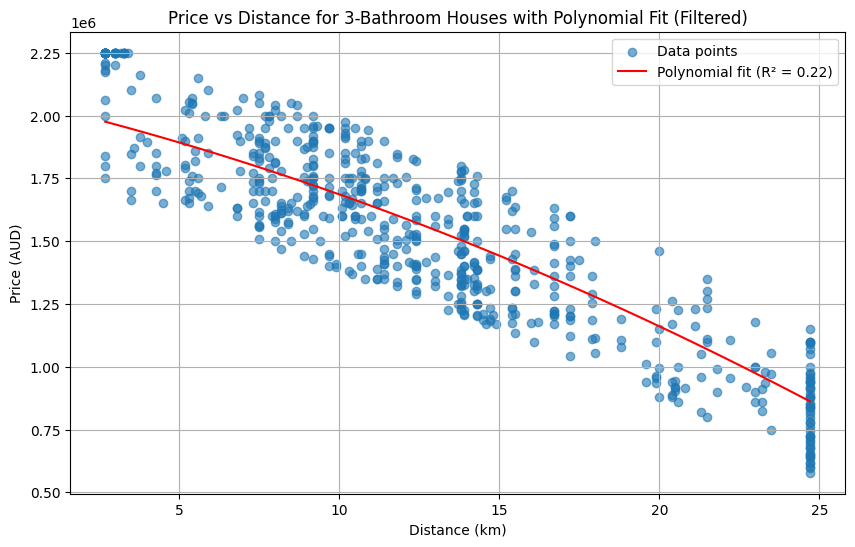

In [8]:
# Plot for 3-bathroom houses
plt.figure(figsize=(10, 6))
plt.scatter(X_3_bathrooms_filtered, y_3_bathrooms_filtered, alpha=0.6, label="Data points")
plt.plot(X_range_3_bathrooms, y_range_pred_3_bathrooms, color='red', label=f"Polynomial fit (R² = {r2_3_bathrooms:.2f})")
plt.title("Price vs Distance for 3-Bathroom Houses with Polynomial Fit (Filtered)")
plt.xlabel("Distance (km)")
plt.ylabel("Price (AUD)")
plt.legend()
plt.grid(True)
plt.show()

## 3. Price vs Distance with Number of Schools ##

In [9]:
# Filter out rows with missing 'Schooling_Facilities'
filtered_data_schools = data.dropna(subset=['Schooling_Facilities'])

# Extract relevant columns: Price, Distance, and Number of Schools
X_distance = filtered_data_schools['Distance_from_CBD'].values.reshape(-1, 1)
y_price = filtered_data_schools['Price'].values
school_count = filtered_data_schools['Schooling_Facilities'].values

# Polynomial transformation (degree 2)
X_poly_schools_distance = poly.fit_transform(X_distance)

# Perform polynomial regression
regressor.fit(X_poly_schools_distance, y_price)

# Create smoother polynomial fit curve
X_range_schools_distance = np.linspace(X_distance.min(), X_distance.max(), 100).reshape(-1, 1)
X_range_poly_schools_distance = poly.transform(X_range_schools_distance)
y_range_pred_schools_distance = regressor.predict(X_range_poly_schools_distance)

# R-squared value
r2_schools_distance = r2_score(y_price, regressor.predict(X_poly_schools_distance))

# Remove outliers with a stricter threshold
y_pred_actual_schools_distance = regressor.predict(X_poly_schools_distance)
residuals_schools_distance = np.abs(y_price - y_pred_actual_schools_distance)
threshold_schools_distance = 200000  # Stricter threshold for filtering out more outliers
filtered_indices_schools_distance = residuals_schools_distance <= threshold_schools_distance
X_schools_distance_filtered = X_distance[filtered_indices_schools_distance]
y_schools_distance_filtered = y_price[filtered_indices_schools_distance]

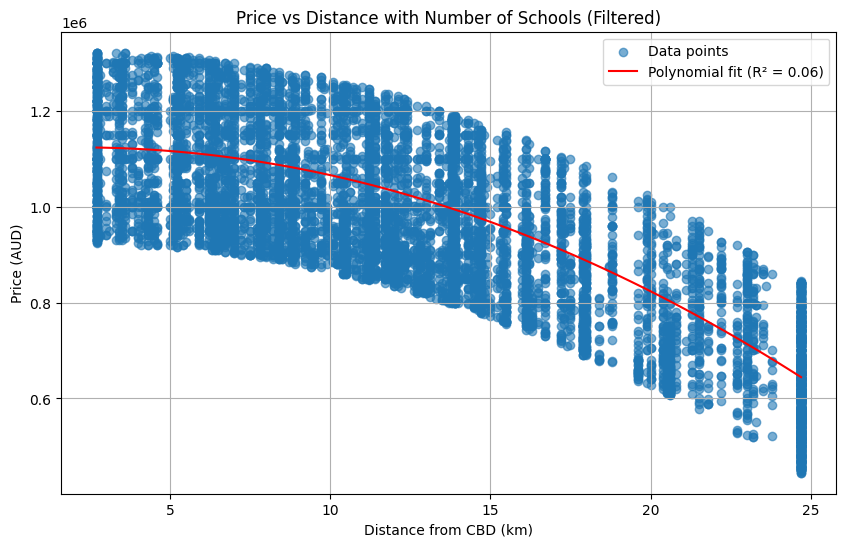

In [10]:
# Plot for Price vs Distance with Number of Schools
plt.figure(figsize=(10, 6))
plt.scatter(X_schools_distance_filtered, y_schools_distance_filtered, alpha=0.6, label="Data points")
plt.plot(X_range_schools_distance, y_range_pred_schools_distance, color='red', label=f"Polynomial fit (R² = {r2_schools_distance:.2f})")
plt.title("Price vs Distance with Number of Schools (Filtered)")
plt.xlabel("Distance from CBD (km)")
plt.ylabel("Price (AUD)")
plt.legend()
plt.grid(True)
plt.show()